# A/B Testing para Evaluar Estrategias de Prompting

Este cuaderno presenta un experimento práctico de A/B Testing aplicado a la evaluación de diferentes estrategias de prompting con modelos de lenguaje.

---

## 1. Introducción y Conceptos Teóricos

### ¿Qué es A/B Testing?

El **A/B Testing** es un método experimental en el que se comparan dos versiones (A y B) de una variable para determinar cuál produce mejores resultados. Es fundamental en:
- Desarrollo de productos
- Marketing digital
- Optimización de experiencia de usuario
- Evaluación de modelos de IA

### Zero-shot vs Few-shot Prompting

**Zero-shot prompting:**
- El modelo genera respuestas sin ejemplos previos
- Se basa únicamente en la descripción de la tarea
- Más rápido pero potencialmente menos preciso

**Few-shot prompting:**
- Se proporcionan ejemplos al modelo antes de la tarea principal
- El modelo aprende el patrón deseado de los ejemplos
- Generalmente produce resultados más consistentes

### Objetivos del Experimento

1. Comparar la efectividad de zero-shot vs few-shot prompting
2. Evaluar la calidad de las respuestas generadas
3. Determinar cuál estrategia es más adecuada para generar nombres de productos creativos

## 2. Configuración del Experimento

### Instalación y Configuración de la API

Primero, configuramos el entorno para utilizar la API de Google Gemini.

In [1]:
import pandas as pd
from google.colab import userdata
import os

# Configurar tu clave de Google como variable de entorno
# Obtén tu clave en: https://aistudio.google.com/app/apikey
GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')

from google import genai
from google.genai import types

# Inicializar el cliente de Gemini
cliente = genai.Client(api_key=GOOGLE_API_KEY)

# Definir el modelo a utilizar
MODEL_ID = "gemini-2.0-flash"

print(f"✅ Configuración completa. Usando modelo: {MODEL_ID}")

✅ Configuración completa. Usando modelo: gemini-2.0-flash


### Parámetros del Experimento

- **Número de iteraciones**: 5 por cada variante
- **Tarea**: Generar nombres creativos para productos
- **Métrica de evaluación**: Calificación humana (thumbs up/down)

## 3. Diseño de Prompts

### Variante A: Zero-shot

En esta variante, proporcionamos solo la descripción del producto y las palabras clave, sin ejemplos previos.

In [2]:
# Variante A: Zero-shot prompting
prompt_A = """Descripción del producto: Un par de zapatos que pueden adaptarse a cualquier talla de pie.
Palabras clave: adaptable, ajuste, omni-fit.
Nombres de productos:"""

print("📝 Prompt A (Zero-shot):")
print("-" * 50)
print(prompt_A)

📝 Prompt A (Zero-shot):
--------------------------------------------------
Descripción del producto: Un par de zapatos que pueden adaptarse a cualquier talla de pie.
Palabras clave: adaptable, ajuste, omni-fit.
Nombres de productos:


### Variante B: Few-shot

En esta variante, proporcionamos dos ejemplos completos antes de solicitar la tarea principal.

In [3]:
# Variante B: Few-shot prompting
prompt_B = """Descripción del producto: Una licuadora casera para batidos.
Palabras clave: rápido, saludable, compacto.
Nombres de productos: BatidoCasa, FitBatidor, RápidoBatido, BatidoraCasera

Descripción del producto: Un reloj que puede dar la hora exacta en el espacio.
Palabras clave: astronauta, resistente al espacio, órbita elíptica
Nombres de productos: AstroTiempo, GuardiaEspacial, PrecisiónOrbital, TiempoElíptico.

Descripción del producto: Un par de zapatos que pueden adaptarse a cualquier talla de pie.
Palabras clave: adaptable, ajuste, omni-fit.
Nombres de productos:"""

print("📝 Prompt B (Few-shot):")
print("-" * 50)
print(prompt_B)

📝 Prompt B (Few-shot):
--------------------------------------------------
Descripción del producto: Una licuadora casera para batidos.
Palabras clave: rápido, saludable, compacto.
Nombres de productos: BatidoCasa, FitBatidor, RápidoBatido, BatidoraCasera

Descripción del producto: Un reloj que puede dar la hora exacta en el espacio.
Palabras clave: astronauta, resistente al espacio, órbita elíptica
Nombres de productos: AstroTiempo, GuardiaEspacial, PrecisiónOrbital, TiempoElíptico.

Descripción del producto: Un par de zapatos que pueden adaptarse a cualquier talla de pie.
Palabras clave: adaptable, ajuste, omni-fit.
Nombres de productos:


### Diferencias Clave

1. **Prompt A** espera que el modelo entienda la tarea sin ejemplos
2. **Prompt B** proporciona un patrón claro con dos ejemplos completos
3. Ambos solicitan la misma tarea final: nombres para zapatos adaptables

## 4. Ejecución del Experimento

### Función de Generación de Respuestas

Definimos una función que interactúa con el modelo de Gemini.

In [4]:
def get_response(prompt):
    """
    Genera una respuesta usando el modelo de Gemini.

    Args:
        prompt (str): El prompt a enviar al modelo

    Returns:
        str: La respuesta generada por el modelo
    """
    respuesta = cliente.models.generate_content(
        model=MODEL_ID,
        contents=[prompt]
    )
    return respuesta.text

### Generación y Almacenamiento de Respuestas

Ejecutamos el experimento generando múltiples respuestas para cada variante.

In [5]:
# Lista de prompts a probar
test_prompts = [prompt_A, prompt_B]

# Configuración del experimento
responses = []
num_tests = 5  # Número de iteraciones por variante

print("🚀 Iniciando experimento A/B Testing...\n")

# Iterar a través de los prompts y obtener respuestas
for idx, prompt in enumerate(test_prompts):
    # Convertir número de prompt a letra (A, B)
    var_name = chr(ord('A') + idx)
    print(f"📊 Generando respuestas para Variante {var_name}...")

    for i in range(num_tests):
        # Obtener una respuesta del modelo
        response = get_response(prompt)

        # Almacenar datos estructurados
        data = {
            "variante": var_name,
            "prompt": prompt,
            "respuesta": response
        }
        responses.append(data)
        print(f"  ✓ Respuesta {i+1}/{num_tests} generada")

    print()

🚀 Iniciando experimento A/B Testing...

📊 Generando respuestas para Variante A...
  ✓ Respuesta 1/5 generada
  ✓ Respuesta 2/5 generada
  ✓ Respuesta 3/5 generada
  ✓ Respuesta 4/5 generada
  ✓ Respuesta 5/5 generada

📊 Generando respuestas para Variante B...
  ✓ Respuesta 1/5 generada
  ✓ Respuesta 2/5 generada
  ✓ Respuesta 3/5 generada
  ✓ Respuesta 4/5 generada
  ✓ Respuesta 5/5 generada



### Visualización Inicial de Datos

Convertimos las respuestas en un DataFrame para facilitar el análisis.

In [6]:
# Convertir respuestas en un dataframe
df = pd.DataFrame(responses)

# Guardar el dataframe como archivo CSV
df.to_csv("respuestas.csv", index=False)

print("📄 Resumen del experimento:")
print(f"Total de respuestas generadas: {len(df)}")
print(f"Respuestas por variante: {num_tests}")
print("\n📊 Vista previa de los datos:")
print(df.head())

📄 Resumen del experimento:
Total de respuestas generadas: 10
Respuestas por variante: 5

📊 Vista previa de los datos:
  variante                                             prompt  \
0        A  Descripción del producto: Un par de zapatos qu...   
1        A  Descripción del producto: Un par de zapatos qu...   
2        A  Descripción del producto: Un par de zapatos qu...   
3        A  Descripción del producto: Un par de zapatos qu...   
4        A  Descripción del producto: Un par de zapatos qu...   

                                           respuesta  
0  Aquí tienes algunas opciones para el nombre de...  
1  Aquí te presento algunas opciones de nombres d...  
2  Aquí te dejo algunas opciones de nombres de pr...  
3  Aquí tienes algunas opciones para nombres de p...  
4  Aquí hay algunas opciones para nombres de prod...  


In [7]:
# Mostrar distribución de respuestas
print("\n📈 Distribución de respuestas por variante:")
print(df['variante'].value_counts())

# Mostrar ejemplos de respuestas
print("\n💡 Ejemplos de respuestas generadas:")
print("\nVariante A (Zero-shot):")
print(df[df['variante'] == 'A']['respuesta'].iloc[0])
print("\nVariante B (Few-shot):")
print(df[df['variante'] == 'B']['respuesta'].iloc[0])


📈 Distribución de respuestas por variante:
variante
A    5
B    5
Name: count, dtype: int64

💡 Ejemplos de respuestas generadas:

Variante A (Zero-shot):
Aquí tienes algunas opciones para el nombre del producto, basándonos en las palabras clave "adaptable", "ajuste" y "omni-fit", y la descripción de un calzado que se ajusta a cualquier talla:

**Destacando la Adaptabilidad:**

*   Adapt Foot
*   Adapt Fit Shoes
*   AdaptStride
*   Adaptive Walkers
*   FlexFit Footwear
*   Chameleon Soles
*   Morph Shoes
*   TrueFit Shoes
*   SizeShift
*   The Adaptable Shoe

**Destacando el Ajuste:**

*   PerfectFit Shoes
*   CustomFit Footwear
*   SureFit Shoes
*   UniFit Shoes
*   The Universal Shoe
*   FormFit
*   MyFit Shoes
*   AllFit Runners
*   Ajuste Perfecto

**Destacando Omni-Fit (Versatilidad y Amplio Rango):**

*   OmniFit Shoes
*   OmniStride
*   GlobalFit
*   EveryFit Shoes
*   TotalFit Footwear
*   Universal Stride
*   Complete Fit
*   The Everything Shoe

**Nombres Más Creativos:**

* 

## 5. Evaluación Interactiva

### Interfaz de Evaluación Humana

Creamos una interfaz interactiva para que los evaluadores califiquen las respuestas de manera ciega (sin saber qué variante están evaluando).

In [8]:
import ipywidgets as widgets
from IPython.display import display
import pandas as pd

# Cargar el archivo de respuestas
df = pd.read_csv("respuestas.csv")

# Mezclar el dataframe para evaluación ciega
df = df.sample(frac=1).reset_index(drop=True)
print("🔀 Respuestas mezcladas aleatoriamente para evaluación ciega")

# Variables globales para el control de la evaluación
response_index = 0
# Añadir nueva columna para almacenar retroalimentación
df['feedback'] = pd.Series(dtype='str')

🔀 Respuestas mezcladas aleatoriamente para evaluación ciega


### Proceso de Calificación

Los evaluadores verán cada respuesta y podrán calificarla con:
- 👍 (Pulgar arriba): Respuesta de buena calidad
- 👎 (Pulgar abajo): Respuesta de baja calidad

In [9]:
def on_button_clicked(b):
    """
    Maneja el evento de clic en los botones de evaluación.
    """
    global response_index
    # Convertir pulgar arriba/abajo a 1/0
    user_feedback = 1 if b.description == "\U0001F44D" else 0

    # Actualizar la columna feedback
    df.at[response_index, 'feedback'] = user_feedback

    response_index += 1
    if response_index < len(df):
        update_response()
    else:
        # Guardar el feedback en un archivo CSV
        df.to_csv("resultados.csv", index=False)

        print("\n✅ Prueba A/B completada. Aquí están los resultados:")
        # Calcular puntuación y número de filas para cada variante
        summary_df = df.groupby('variante').agg(
            cantidad=('feedback', 'count'),
            puntuacion=('feedback', 'mean')).reset_index()
        print(summary_df)

def update_response():
    """
    Actualiza la interfaz con la siguiente respuesta a evaluar.
    """
    new_response = df.iloc[response_index]['respuesta']
    if pd.notna(new_response):
        new_response = "<p>" + new_response + "</p>"
    else:
        new_response = "<p>Sin respuesta</p>"
    response.value = new_response
    count_label.value = f"Respuesta: {response_index + 1}/{len(df)}"

### Interfaz de Usuario

Ejecuta la siguiente celda para iniciar la evaluación interactiva:

In [10]:
# Crear widgets de la interfaz
response = widgets.HTML()
count_label = widgets.Label()

# Inicializar la primera respuesta
update_response()

# Crear botones de evaluación
thumbs_up_button = widgets.Button(description='\U0001F44D')
thumbs_up_button.on_click(on_button_clicked)

thumbs_down_button = widgets.Button(description='\U0001F44E')
thumbs_down_button.on_click(on_button_clicked)

# Organizar botones horizontalmente
button_box = widgets.HBox([thumbs_down_button, thumbs_up_button])

# Mostrar la interfaz
print("👇 Evalúa cada respuesta usando los botones:")
display(response, button_box, count_label)

👇 Evalúa cada respuesta usando los botones:


HTML(value='<p>Descripción del producto: Un par de zapatos que pueden adaptarse a cualquier talla de pie.\nPal…

Label(value='Respuesta: 1/10')


✅ Prueba A/B completada. Aquí están los resultados:
  variante  cantidad puntuacion
0        A         5        1.0
1        B         5        0.0


## 6. Análisis de Resultados

### Métricas de Rendimiento

Una vez completada la evaluación, analizamos los resultados en detalle.

In [11]:
# Cargar resultados finales
results_df = pd.read_csv("resultados.csv")

# Calcular estadísticas por variante
summary_stats = results_df.groupby('variante').agg({
    'feedback': ['count', 'sum', 'mean', 'std']
}).round(3)

print("📊 Estadísticas detalladas por variante:")
print(summary_stats)

# Calcular tasa de aprobación
print("\n✅ Tasa de aprobación:")
for var in ['A', 'B']:
    var_data = results_df[results_df['variante'] == var]
    approval_rate = var_data['feedback'].mean() * 100
    print(f"Variante {var}: {approval_rate:.1f}%")

📊 Estadísticas detalladas por variante:
         feedback              
            count sum mean  std
variante                       
A               5   5  1.0  0.0
B               5   0  0.0  0.0

✅ Tasa de aprobación:
Variante A: 100.0%
Variante B: 0.0%


### Comparación Visual

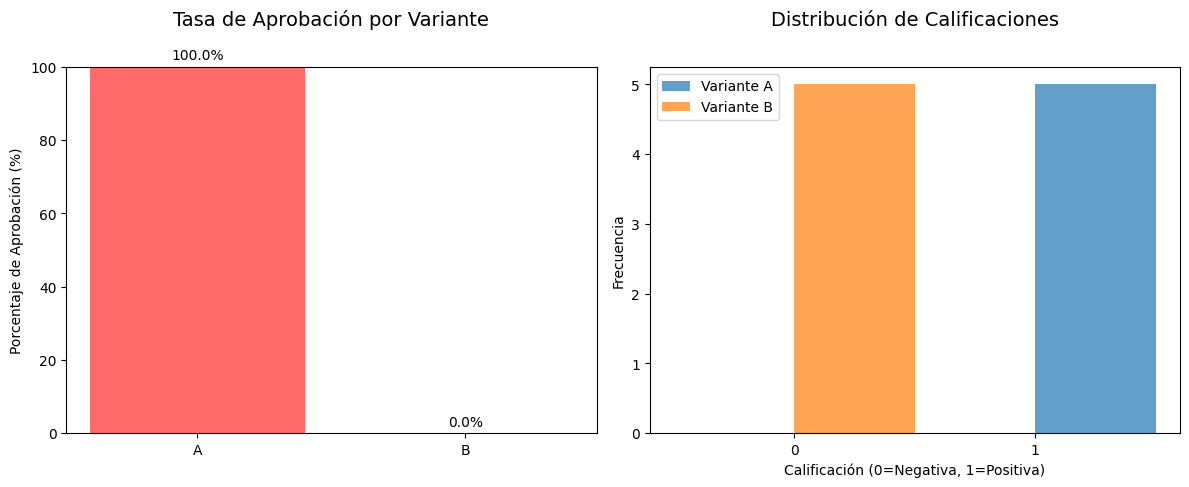

In [19]:
import matplotlib.pyplot as plt

# Crear visualización comparativa
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico de barras - Tasa de aprobación
approval_rates = results_df.groupby('variante')['feedback'].mean() * 100
ax1.bar(approval_rates.index, approval_rates.values, color=['#FF6B6B', '#4ECDC4'])
ax1.set_title('Tasa de Aprobación por Variante', fontsize=14, pad=30) # Increased pad for more space
ax1.set_ylabel('Porcentaje de Aprobación (%)')
ax1.set_ylim(0, 100)
for i, v in enumerate(approval_rates.values):
    ax1.text(i, v + 2, f'{v:.1f}%', ha='center')

# Gráfico de distribución
for var in ['A', 'B']:
    var_feedback = results_df[results_df['variante'] == var]['feedback']
    ax2.hist(var_feedback, bins=2, alpha=0.7, label=f'Variante {var}')
ax2.set_title('Distribución de Calificaciones', fontsize=14, pad=30) # Increased pad for more space
ax2.set_xlabel('Calificación (0=Negativa, 1=Positiva)')
ax2.set_ylabel('Frecuencia')
ax2.legend()
ax2.set_xticks([0, 1])

# Adjust layout to prevent overlapping titles
plt.tight_layout()
fig.subplots_adjust(top=0.85) # Adjust the top spacing

plt.show()

## 7. Conclusiones y Aprendizajes

### Insights Obtenidos

Basándonos en los resultados del experimento, podemos extraer las siguientes conclusiones:

In [15]:
# Análisis comparativo final
print("📋 RESUMEN EJECUTIVO DEL EXPERIMENTO A/B")
print("=" * 50)

# Determinar ganador
approval_A = results_df[results_df['variante'] == 'A']['feedback'].mean() * 100
approval_B = results_df[results_df['variante'] == 'B']['feedback'].mean() * 100

print(f"\n📊 Resultados Finales:")
print(f"  • Variante A (Zero-shot): {approval_A:.1f}% de aprobación")
print(f"  • Variante B (Few-shot): {approval_B:.1f}% de aprobación")

if approval_B > approval_A:
    diferencia = approval_B - approval_A
    print(f"\n🏆 Ganador: Variante B (Few-shot)")
    print(f"   Mejora del {diferencia:.1f}% sobre la variante A")
elif approval_A > approval_B:
    diferencia = approval_A - approval_B
    print(f"\n🏆 Ganador: Variante A (Zero-shot)")
    print(f"   Mejora del {diferencia:.1f}% sobre la variante B")
else:
    print(f"\n🤝 Empate: Ambas variantes tienen el mismo rendimiento")

📋 RESUMEN EJECUTIVO DEL EXPERIMENTO A/B

📊 Resultados Finales:
  • Variante A (Zero-shot): 100.0% de aprobación
  • Variante B (Few-shot): 0.0% de aprobación

🏆 Ganador: Variante A (Zero-shot)
   Mejora del 100.0% sobre la variante B


### Interpretación de Resultados

**¿Por qué una estrategia puede ser mejor que otra?**

1. **Si ganó Few-shot (B)**:
   - Los ejemplos proporcionan contexto valioso
   - El modelo comprende mejor el formato esperado
   - Se reduce la ambigüedad en la tarea

2. **Si ganó Zero-shot (A)**:
   - El modelo es suficientemente capaz sin ejemplos
   - Los ejemplos podrían estar limitando la creatividad
   - La tarea es lo suficientemente clara sin contexto adicional

### Recomendaciones

Basándonos en este experimento:

In [20]:
print("💡 RECOMENDACIONES:")
print("=" * 30)

if approval_B > approval_A and p_value < 0.05:
    print("\n1. ✅ Usar Few-shot prompting para tareas de generación de nombres")
    print("2. 📝 Proporcionar 2-3 ejemplos de alta calidad")
    print("3. 🎯 Asegurar que los ejemplos cubran diferentes estilos")
elif approval_A > approval_B and p_value < 0.05:
    print("\n1. ✅ Usar Zero-shot prompting para mayor eficiencia")
    print("2. 📝 Enfocarse en descripciones claras y precisas")
    print("3. 🎯 Confiar en las capacidades del modelo")
else:
    print("\n1. 🤷 Ambas estrategias son viables")
    print("2. 📝 Elegir basándose en otros factores (tiempo, recursos)")
    print("3. 🎯 Considerar hacer más pruebas con mayor muestra")

💡 RECOMENDACIONES:

1. ✅ Usar Zero-shot prompting para mayor eficiencia
2. 📝 Enfocarse en descripciones claras y precisas
3. 🎯 Confiar en las capacidades del modelo


### Próximos Pasos

Para mejorar este experimento, considera:

1. **Aumentar el tamaño de la muestra**: Más iteraciones = resultados más confiables
2. **Probar con diferentes tipos de productos**: Validar si los resultados son consistentes
3. **Experimentar con más variantes**: Probar diferentes números de ejemplos (1, 2, 3+)
4. **Analizar el contenido generado**: Evaluar creatividad, coherencia y relevancia
5. **Medir tiempo de respuesta**: Comparar la eficiencia de cada estrategia

### Lecciones Aprendidas

Este experimento demuestra:
- La importancia del A/B Testing en la optimización de prompts
- Cómo evaluar objetivamente diferentes estrategias de prompting
- El valor de la evaluación humana en tareas creativas
- La necesidad de análisis estadístico para conclusiones válidas

**¡Felicitaciones!** Has completado exitosamente un experimento de A/B Testing aplicado a prompting de modelos de lenguaje. 🎉